In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [3]:
data = pd.read_csv('svm_polydata2.csv', header=None)
X = data.values[:, :2]
y = data.values[:, 2]

In [4]:
X.shape

(61, 2)

In [5]:
X

array([[-167,  -60],
       [-155,  -84],
       [-119, -119],
       [-137, -100],
       [ -99, -133],
       [ -60, -141],
       [ -34, -131],
       [  -2, -107],
       [  16,  -72],
       [  36,  -17],
       [  51,   17],
       [  65,   48],
       [  87,   98],
       [ 102,  151],
       [ 122,  192],
       [ 144,  227],
       [-192,  -25],
       [-203,   23],
       [-220,   62],
       [-222,   95],
       [-237,  133],
       [-253,  178],
       [-280,  220],
       [-293,  252],
       [-136,   -7],
       [-115,   11],
       [ -55,   47],
       [ -46,   25],
       [ -86,   -9],
       [-117,  -35],
       [ -91,  -78],
       [ -18,  -24],
       [ -62,  -75],
       [  19,  -12],
       [ -24,   67],
       [  51,   86],
       [-202,  -71],
       [-216,  -99],
       [-238, -107],
       [-241, -134],
       [-233, -148],
       [-274, -119],
       [-276,  -36],
       [-243,   30],
       [-285,   84],
       [-281,   26],
       [-254,   83],
       [-254,

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [10]:
# The C parameter tells the SVM optimization how much you want 
# to avoid misclassifying each training example. For large values 
# of C, the optimization will choose a smaller-margin hyperplane 
# if that hyperplane does a better job of getting all the training 
# points classified correctly. Conversely, a very small value of C 
# will cause the optimizer to look for a larger-margin separating 
# hyperplane, even if that hyperplane misclassifies more points. 
# For very tiny values of C, you should get misclassified examples, 
# often even if your training data is linearly separable.

def draw_svm(X, y, C=1.0):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='poly', gamma='auto', C=C)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

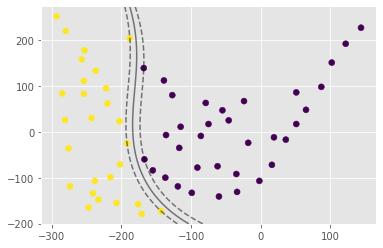

In [11]:
clf = draw_svm(X, y)

In [12]:
score = clf.score(X, y)

In [13]:
print("score=", score)

score= 1.0


In [14]:
pred = clf.predict([(-130, 110)])
print ("pred=", pred)

pred= [0]


In [15]:
pred = clf.predict([(-170, -160)])
print ("pred=", pred)

pred= [1]


In [16]:
pred = clf.predict([(80, 90)])
print ("pred=", pred)

pred= [0]


In [17]:
pred = clf.predict([(-280, 20)])
print ("pred=", pred)

pred= [1]


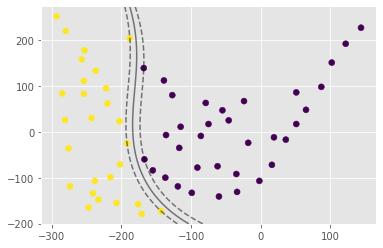

In [18]:
clf = draw_svm(X, y, C=100)

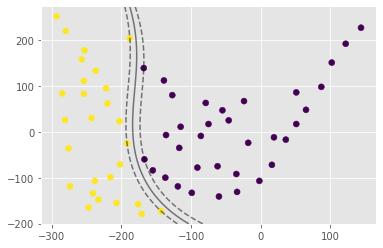

In [19]:
clf = draw_svm(X, y, C=0.001)

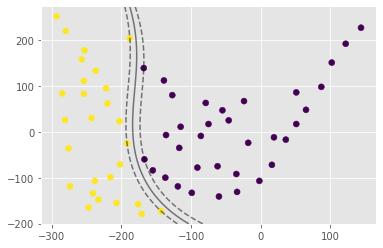

In [20]:
clf = draw_svm(X, y, C=0.00001)